###Часть 1
Найдем минимумы двух функций оптимизации с помощью двух алгоритмом бибилотеки PyGMO

Устанавливаем PyGMO

In [40]:
!pip install pygmo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
import cv2
import math
import pygmo as pg
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation
from matplotlib import rc
from matplotlib import colors as cm
from google.colab import files
from IPython.display import Image
import cv2

Функция Матьяса: $f(x,y)=0.26(x^2+y^2)-0.48xy$

In [42]:
class Matias_E:
  def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
  def fitness(self, x):
        return [0.26*(x[0]*x[0] + x[1]*x[1]) - 0.48*x[0]*x[1]]
  def get_bounds(self):
        return ([self.x_min, self.y_min],[self.x_max, self.y_max])

Функция Химмельблау:

$f(x,y)=(x^2+y-11)^2+(x+y^2-7)^2$

In [43]:
class H_E:
  def __init__(self, x_min, y_min, x_max, y_max):
        self.x_min = x_min
        self.y_min = y_min
        self.x_max = x_max
        self.y_max = y_max
  def fitness(self, x):
        return [(x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2]
  def get_bounds(self):
        return ([self.x_min, self.y_min],[self.x_max, self.y_max])

Создаем проблему

In [44]:
def CreateProblem(E):
  prob = pg.problem(E)
  return prob

Алгоритм серых волков

In [46]:
def GrayWolves(prob):
  algo = pg.algorithm(pg.gwo(gen = 10))
  pop = pg.population(prob, size = 100)
  pop = algo.evolve(pop)
  print("Минимум функции по алгоритму серых волков = {}".format(pop.champion_f))
  return (algo, pop)

Алгоритм колонии пчел

In [45]:
def BeeColony(prob):
  algo = pg.algorithm(pg.bee_colony(gen = 10, limit = 10))
  pop = pg.population(prob, size = 100)
  pop = algo.evolve(pop)
  print("Минимум функции по алгоритму колонии пчел = {}".format(pop.champion_f))
  return (algo, pop)

График

In [47]:
def Show(prob, algo, pop):
  # Количество Эволюций
  number_of_evolutions = 100
  # Пустые контейнеры
  individuals_list = []
  fitness_list = []
  # Произведём эволюцию несколько раз
  for i in range(number_of_evolutions):
      pop = algo.evolve(pop)
      individuals_list.append(pop.get_x()[pop.best_idx()])
      fitness_list.append(pop.get_f()[pop.best_idx()])
  # Вытащим лучших индивидов из всех поколений
  best_x = [ind[0] for ind in individuals_list]
  best_y = [ind[1] for ind in individuals_list]
  # Выразим границы задачи
  (x_min, y_min), (x_max, y_max) = prob.get_bounds()
  # Изобразим функцию
  grid_points = 100
  x_vector = np.linspace(x_min, x_max, grid_points)
  y_vector = np.linspace(y_min, y_max, grid_points)
  x_grid, y_grid = np.meshgrid(x_vector, y_vector)
  z_grid = np.zeros((grid_points, grid_points))
  for i in range(x_grid.shape[1]):
      for j in range(x_grid.shape[0]):
          z_grid[i, j] = prob.fitness([x_grid[i, j], y_grid[i, j]])[0]
  # Создаем график
  fig, ax = plt.subplots(figsize=(9,5))
  cs = ax.contour(x_grid, y_grid, z_grid, 50)
  # Показываем лучших представителей за каждое поколение
  ax.scatter(best_x, best_y, marker='x', color='r')
  # Оформление
  ax.set_xlim((x_min, x_max))
  ax.set_ylim((y_min, y_max))
  ax.set_title('Функция', fontweight='bold')
  ax.set_xlabel('X')
  ax.set_ylabel('Y')
  cbar = fig.colorbar(cs)
  cbar.ax.set_ylabel(r'Значение функции $f(x,y)$')
  plt.tight_layout()
  # Выводим на экран
  plt.show()

Вызов всех методов

In [48]:
def Start(prob):
  algo_pop = BeeColony(prob)
  Show(prob, algo_pop[0], algo_pop[1])
  algo_pop = GrayWolves(prob)
  Show(prob, algo_pop[0], algo_pop[1])

Тест для функции Матьяса

Минимум функции по алгоритму колонии пчел = [0.01288105]


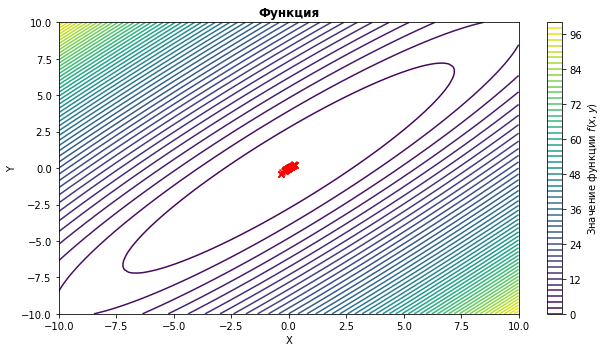

Минимум функции по алгоритму серых волков = [4.69763665e-17]


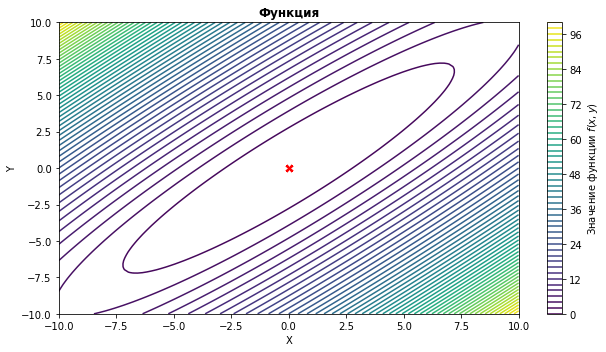

In [50]:
prob = CreateProblem(Matias_E(-10,-10,10,10))
Start(prob)

Тест для функции Химмельблау

Минимум функции по алгоритму колонии пчел = [0.00192678]


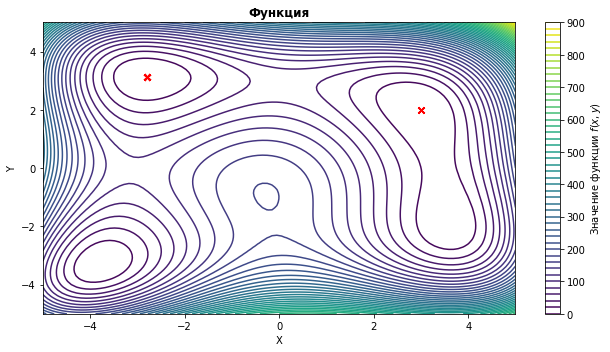

Минимум функции по алгоритму серых волков = [0.00044111]


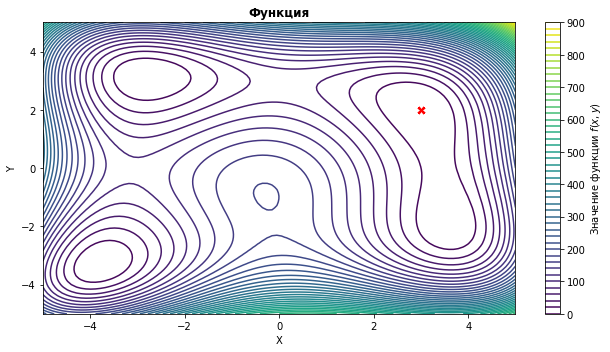

In [51]:
prob = CreateProblem(H_E(-5,-5,5,5))
Start(prob)

## Часть 2
Создадим поверхность по изображению и найдем ее минимум

(649, 802)


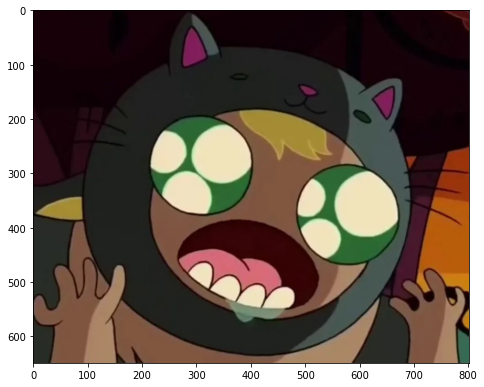

In [52]:
# Читаем изображение
img_path = "картинка132.jpg"
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Задаем размер
plt.figure(figsize=(img.shape[1]/100, img.shape[0]/100))
# Выводим на экран
plt.imshow(img)
#Делаем изображение черно-белым
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

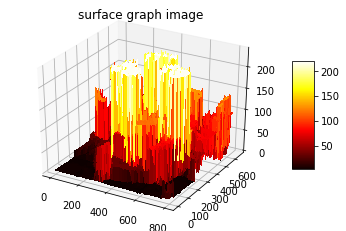

In [57]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X = np.arange(0, 802, 1)
Y = np.arange(0, 649, 1)
X, Y = np.meshgrid(X, Y)
my_cmap = plt.get_cmap("hot")
surf = ax.plot_surface(X, Y, img, linewidth=0,cmap = my_cmap, edgecolor ="none", antialiased=False)
                       


fig.colorbar(surf, shrink=0.5, aspect=5)
plt.title('surface graph image')
plt.show()

In [62]:
class Image:
    def __init__(self, img):
        self.data = img
        
    def fitness(self, x: np.ndarray) -> np.float64:
        return [self.data[int(x[0])][int(x[1])]]

    def get_bounds(self):
        return ([0, 0], [self.data.shape[0]-1, self.data.shape[1]-1])

Минимум функции по алгоритму колонии пчел = [1.]


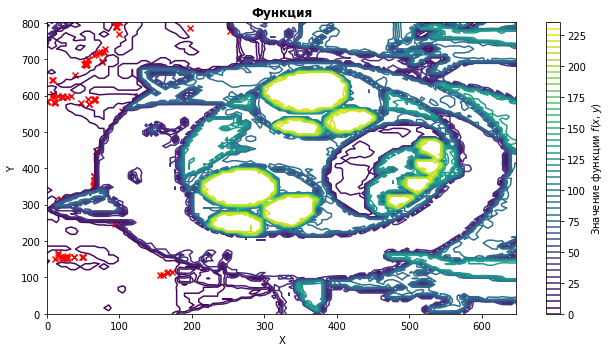

Минимум функции по алгоритму серых волков = [1.]


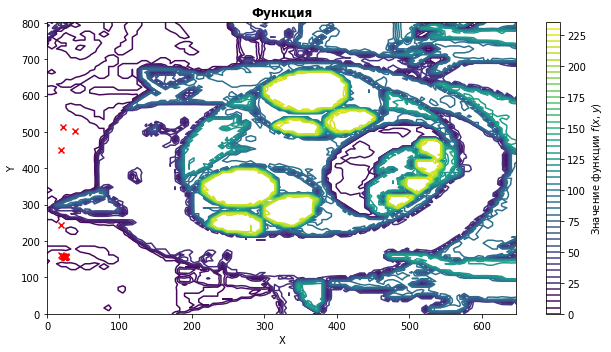

In [63]:
prob = pg.problem(Image(img))
Start(prob)